In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from scipy.signal import find_peaks

In [2]:
pp32 = pd.read_csv("Data/32.csv",delimiter=',',skiprows=7, index_col=0)
pp30 = pd.read_csv("Data/30.csv",delimiter=',',skiprows=7, index_col=0)
pp28 = pd.read_csv("Data/28.csv",delimiter=',',skiprows=7, index_col=0)
pp26 = pd.read_csv("Data/26.csv",delimiter=',',skiprows=7, index_col=0)
pp24 = pd.read_csv("Data/24.csv",delimiter=',',skiprows=7, index_col=0)
pp22 = pd.read_csv("Data/22.csv",delimiter=',',skiprows=7, index_col=0)
pp20 = pd.read_csv("Data/20.csv",delimiter=',',skiprows=7, index_col=0)
pp18 = pd.read_csv("Data/18.csv",delimiter=',',skiprows=7, index_col=0)
pp16 = pd.read_csv("Data/16.csv",delimiter=',',skiprows=7, index_col=0)
pp14 = pd.read_csv("Data/14.csv",delimiter=',',skiprows=7, index_col=0)
pps  = [pp32,pp30,pp28,pp26,pp24,pp22,pp20,pp18,pp16,pp14]

In [3]:
for i,pp in enumerate(pps):
    pp['CH1(V)'] = (3.3 - pp['CH1(V)']) * pp['CH1(V)'] / 68
    pp.rename(columns={'CH1(V)': 'CH1(W)'},inplace=True)

In [4]:
formatter_s = EngFormatter(unit='s')
formatter_w = EngFormatter(unit='W')
def plot_pp(times,chs,labels=None,labels_title=None,title=None):
    plt.rcParams["figure.figsize"] = (8,4)
    for i, (t, ch) in enumerate(zip(times,chs)):
        plt.plot(t,ch,linewidth=.8)
    if labels is not None:
        plt.legend(labels,title=labels_title,bbox_to_anchor=(1.01, 1),loc='upper left', borderaxespad=0.)
    if title is not None:
        plt.title(title)
    plt.grid()
    plt.gca().xaxis.set_major_formatter(formatter_s)
    plt.gca().yaxis.set_major_formatter(formatter_w)
    plt.ylabel('power')
    plt.xlabel('time')
    plt.show()

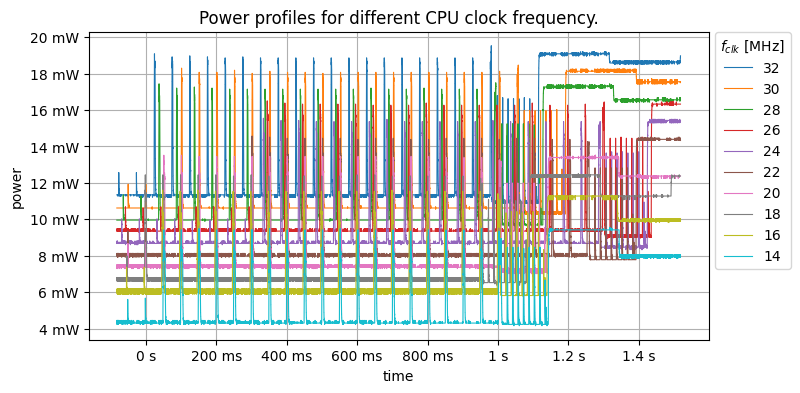

In [5]:
times = np.vstack([pp['Time(S)'] for pp in pps])
chs   = np.vstack([pp['CH1(W)'] for pp in pps])
labels = ["32","30","28","26","24","22","20","18","16","14"]
labels_title = "$f_{clk}$ [MHz]"
title = "Power profiles for different CPU clock frequency."
plot_pp(times,chs,labels,labels_title,title)

In [6]:
npps = []
for ind, pp in enumerate(pps):
    
    peaks, _ = find_peaks(pp['CH1(W)'].values, prominence=.001)

    for i, peak in enumerate(pp['CH1(W)'][peaks].values):
        
        if pp['CH1(W)'][peaks].values[0] - peak < -0.001:
            break
    
    start = peaks[i-1]
    time = pp['Time(S)'][start:].values - pp['Time(S)'][start]
    x = pp['CH1(W)'][start:]

    stop = np.argmin(np.abs(time-1.14))

    npp = pd.DataFrame(dtype=float)    
    npp['t'] = time[:stop]
    npp['w'] = x[:stop].values
    npps.append(npp)
    # plt.plot(npp['t'], npp['w'])
    # plt.xlim(0,1.2)
    # plt.show()

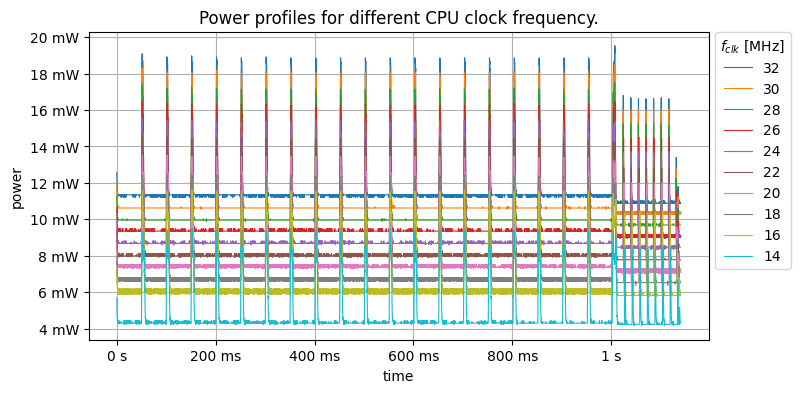

In [7]:
times = np.vstack([npp['t'] for npp in npps])
chs   = np.vstack([npp['w'] for npp in npps])
labels = ["32","30","28","26","24","22","20","18","16","14"]
labels_title = "$f_{clk}$ [MHz]"
title = "Power profiles for different CPU clock frequency."
plot_pp(times,chs,labels,labels_title,title)

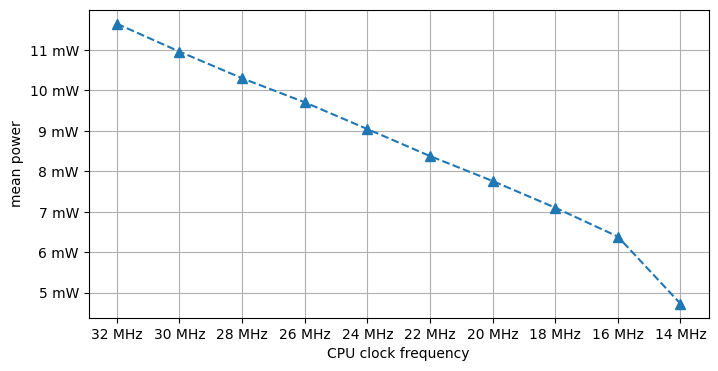

In [8]:
means = np.array([np.mean(npp['w']) for npp in npps])
f = np.arange(32,12,-2) * 1e6
formatter_hz = EngFormatter(unit='Hz')
plt.plot(f, means,'--^', markersize=7)
plt.gca().xaxis.set_major_formatter(formatter_hz)
plt.gca().yaxis.set_major_formatter(formatter_w)
plt.gca().set_xticks(f)
plt.gca().xaxis.set_inverted(True)
plt.ylabel('mean power')
plt.xlabel('CPU clock frequency')
plt.grid()

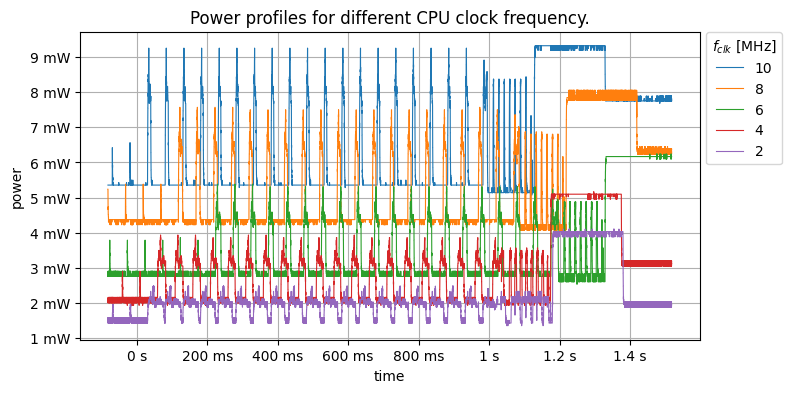

In [9]:
pp10 = pd.read_csv("Data/10.csv",delimiter=',',skiprows=7, index_col=0)
pp8 = pd.read_csv("Data/8.csv",delimiter=',',skiprows=7, index_col=0)
pp6 = pd.read_csv("Data/6.csv",delimiter=',',skiprows=7, index_col=0)
pp4 = pd.read_csv("Data/4.csv",delimiter=',',skiprows=7, index_col=0)
pp2 = pd.read_csv("Data/2new.csv",delimiter=',',skiprows=7, index_col=0)
smallpps = [pp10,pp8,pp6,pp4,pp2]

for i,pp in enumerate(smallpps):
    pp['CH1(V)'] = (3.3 - pp['CH1(V)']) * pp['CH1(V)'] / 68
    pp.rename(columns={'CH1(V)': 'CH1(W)'},inplace=True)

times = np.vstack([pp['Time(S)'] for pp in smallpps])
chs   = np.vstack([pp['CH1(W)'] for pp in smallpps])
labels = ["10","8","6","4","2"]
labels_title = "$f_{clk}$ [MHz]"
title = "Power profiles for different CPU clock frequency."
plot_pp(times,chs,labels,labels_title,title)

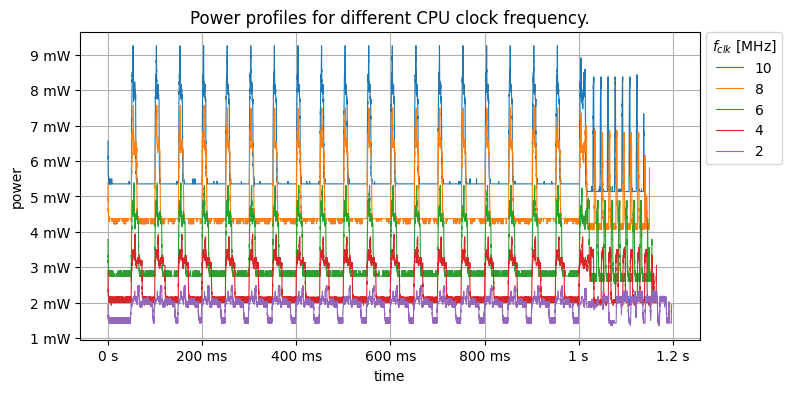

In [10]:
smallnpps = []
for ind, pp in enumerate(smallpps):
    
    peaks, _ = find_peaks(pp['CH1(W)'].values, prominence=.0005)

    for i, peak in enumerate(pp['CH1(W)'][peaks].values):
        
        if pp['CH1(W)'][peaks].values[0] - peak < -0.0003:
            break

    start = peaks[i-1]
    time = pp['Time(S)'][start:].values - pp['Time(S)'][start]
    x = pp['CH1(W)'][start:]

    if   ind == 0:
        stop = np.argmin(np.abs(time-1.14))
    elif ind == 1:
        stop = np.argmin(np.abs(time-1.1505))
    elif ind == 2:
        stop = np.argmin(np.abs(time-1.1557))
    elif ind == 3:
        stop = np.argmin(np.abs(time-1.1653))
    else:
        stop = np.argmin(np.abs(time-1.1975))

    npp = pd.DataFrame(dtype=float)    
    npp['t'] = time[:stop]
    npp['w'] = x[:stop].values
    smallnpps.append(npp)
    # plt.plot(npp['t'], npp['w'])
    # plt.xlim(0,1.2)
    # plt.show()

times = [npp['t'] for npp in smallnpps]
chs   = [npp['w'] for npp in smallnpps]
labels = ["10","8","6","4","2"]
labels_title = "$f_{clk}$ [MHz]"
title = "Power profiles for different CPU clock frequency."
plot_pp(times,chs,labels,labels_title,title)

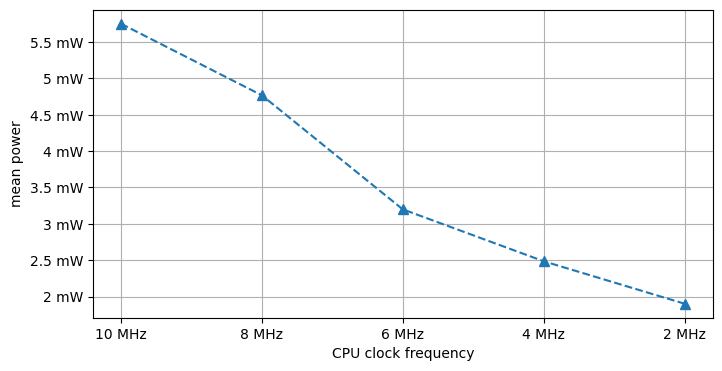

In [11]:
smallmeans = np.array([np.mean(npp['w']) for npp in smallnpps])
f = np.arange(10,0,-2) * 1e6
formatter_hz = EngFormatter(unit='Hz')
plt.plot(f, smallmeans,'--^', markersize=7)
plt.gca().xaxis.set_major_formatter(formatter_hz)
plt.gca().yaxis.set_major_formatter(formatter_w)
plt.gca().set_xticks(f)
plt.gca().xaxis.set_inverted(True)
plt.ylabel('mean power')
plt.xlabel('CPU clock frequency')
plt.grid()

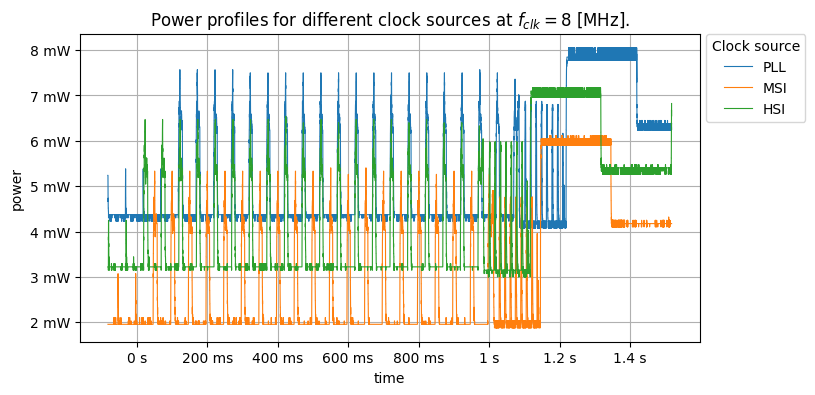

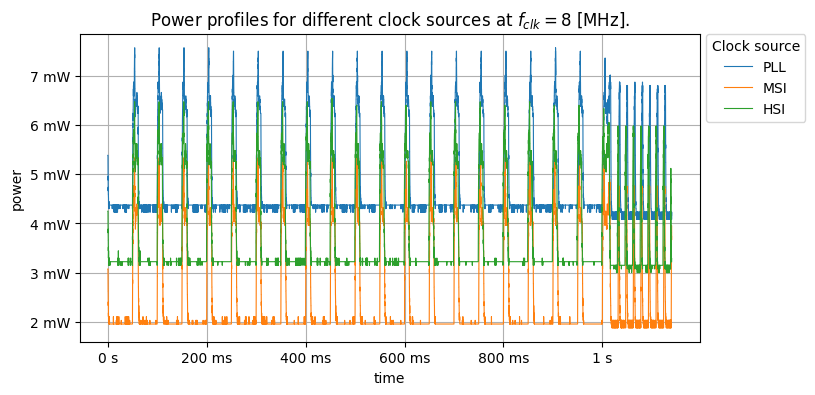

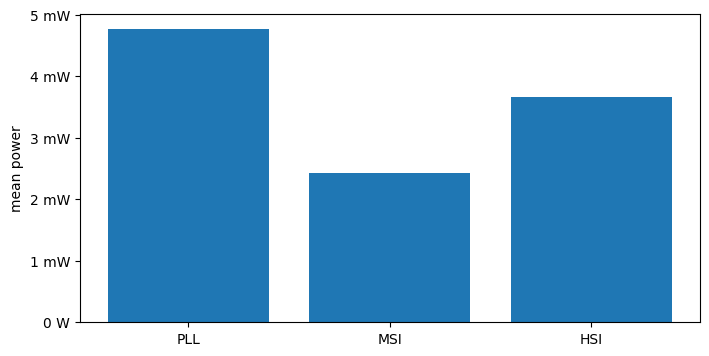

In [12]:
# pp8
pp8MSI = pd.read_csv("Data/8MSI.csv",delimiter=',',skiprows=7, index_col=0)
pp8HSI = pd.read_csv("Data/8HSI.csv",delimiter=',',skiprows=7, index_col=0)

for i,pp in enumerate([pp8MSI,pp8HSI]):
    pp['CH1(V)'] = (3.3 - pp['CH1(V)']) * pp['CH1(V)'] / 68
    pp.rename(columns={'CH1(V)': 'CH1(W)'},inplace=True)

pps8 = [pp8,pp8MSI,pp8HSI]

times = np.vstack([pp['Time(S)'] for pp in pps8])
chs   = np.vstack([pp['CH1(W)'] for pp in pps8])
labels = ["PLL", "MSI", "HSI"]
labels_title = "Clock source"
title = "Power profiles for different clock sources at $f_{clk} = 8$ [MHz]."
plot_pp(times,chs,labels,labels_title,title)

npps8 = []
for ind, pp in enumerate(pps8):
    
    peaks, _ = find_peaks(pp['CH1(W)'].values, prominence=.001)

    for i, peak in enumerate(pp['CH1(W)'][peaks].values):
        
        if pp['CH1(W)'][peaks].values[0] - peak < -0.001:
            break
    
    start = peaks[i-1]
    time = pp['Time(S)'][start:].values - pp['Time(S)'][start]
    x = pp['CH1(W)'][start:]

    stop = np.argmin(np.abs(time-1.14))

    npp = pd.DataFrame(dtype=float)    
    npp['t'] = time[:stop]
    npp['w'] = x[:stop].values
    npps8.append(npp)
    # plt.plot(npp['t'], npp['w'])
    # plt.xlim(0,1.2)
    # plt.show()

times = [npp['t'] for npp in npps8]
chs   = [npp['w'] for npp in npps8]
labels = ["PLL", "MSI", "HSI"]
labels_title = "Clock source"
title = "Power profiles for different clock sources at $f_{clk} = 8$ [MHz]."
plot_pp(times,chs,labels,labels_title,title)

means8 = np.array([np.mean(npp['w']) for npp in npps8])
plt.bar(labels, means8)
plt.gca().yaxis.set_major_formatter(formatter_w)
plt.ylabel('mean power')
plt.show()

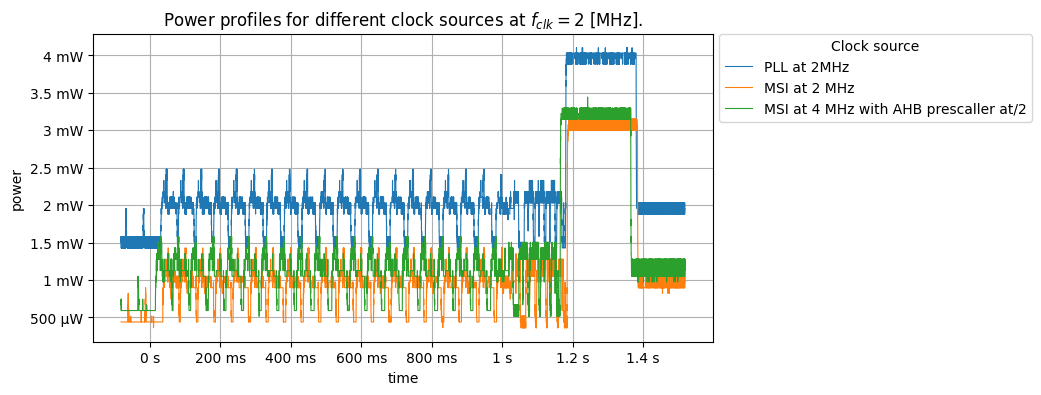

In [13]:
# pp2
pp2MSI2 = pd.read_csv("Data/2a.csv",delimiter=',',skiprows=7, index_col=0)
pp2MSI4 = pd.read_csv("Data/2b.csv",delimiter=',',skiprows=7, index_col=0)

for i,pp in enumerate([pp2MSI2,pp2MSI4]):
    pp['CH1(V)'] = (3.3 - pp['CH1(V)']) * pp['CH1(V)'] / 68
    pp.rename(columns={'CH1(V)': 'CH1(W)'},inplace=True)

pps2 = [pp2,pp2MSI2,pp2MSI4]

times = np.vstack([pp['Time(S)'] for pp in pps2])
chs   = np.vstack([pp['CH1(W)'] for pp in pps2])
labels = ["PLL at 2MHz", "MSI at 2 MHz", "MSI at 4 MHz with AHB prescaller at/2"]
labels_title = "Clock source"
title = "Power profiles for different clock sources at $f_{clk} = 2$ [MHz]."
plot_pp(times,chs,labels,labels_title,title)

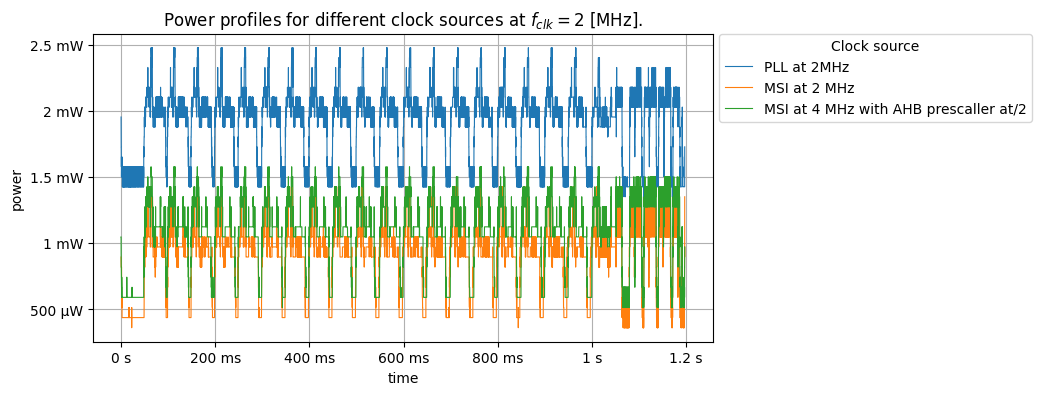

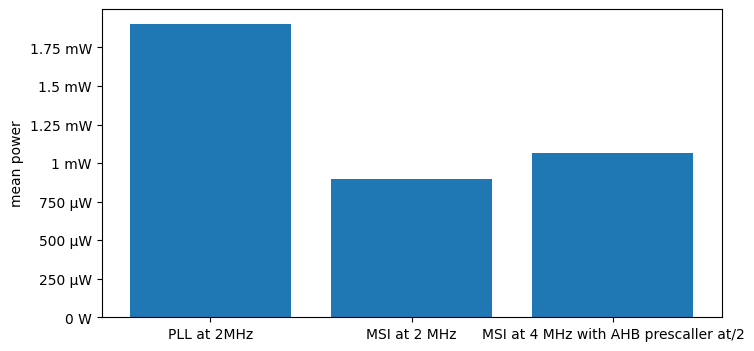

In [14]:
npps2 = []
for ind, pp in enumerate(pps2):
    
    peaks, _ = find_peaks(pp['CH1(W)'].values, prominence=.00035)

    for i, peak in enumerate(pp['CH1(W)'][peaks].values):
        
        if pp['CH1(W)'][peaks].values[0] - peak < -0.0003:
            break
    
    start = peaks[i-1]
    time = pp['Time(S)'][start:].values - pp['Time(S)'][start]
    x = pp['CH1(W)'][start:]

    stop = np.argmin(np.abs(time-1.197))


    npp = pd.DataFrame(dtype=float)    
    npp['t'] = time[:stop]
    npp['w'] = x[:stop].values
    npps2.append(npp)
    # plt.plot(npp['t'], npp['w'])
    # plt.xlim(0,1.2)
    # plt.show()

times = [npp['t'] for npp in npps2]
chs   = [npp['w'] for npp in npps2]
labels = ["PLL at 2MHz", "MSI at 2 MHz", "MSI at 4 MHz with AHB prescaller at/2"]
labels_title = "Clock source"
title = "Power profiles for different clock sources at $f_{clk} = 2$ [MHz]."
plot_pp(times,chs,labels,labels_title,title)


means2 = np.array([np.mean(npp['w']) for npp in npps2])
plt.bar(labels, means2)
plt.gca().yaxis.set_major_formatter(formatter_w)
plt.ylabel('mean power')
plt.show()